# 数据科学的步骤

**问题定义**：与项目相关的利益相关者合作，明确要解决的具体业务问题并确定项目成功的评估标准，如提升的准确度或用户参与度。

**数据收集**：确定可用的数据源，如内部数据库和外部公共数据集，并使用API调用、数据爬取或其他方法收集数据。数据清洗和预处理：处理缺失数据，选择填充缺失值或删除缺失记录，识别并处理数据中的异常值，调整或删除，并确保数据类型正确，适合进行分析和建模。

**数据探索性分析（EDA）**：运用描述性统计分析来总结数据特征，并通过散点图、箱线图等可视化方法展示数据分布和变量间关系。

**特征工程**：创造新特征，如从日期数据提取出“周几”或“月份”，并通过相关性分析等方法选择对模型最有影响的特征。

**建立模型**：根据问题类型选择合适的模型，如决策树或神经网络，并将数据分为训练集和测试集，用训练集来训练模型。

**模型评估**：使用如K折交叉验证等方法评估模型的稳健性，并采用准确率、AUC、均方误差等指标评价模型性能。

**模型优化**：进行超参数调整，如网格搜索或随机搜索，并尝试模型融合，如集成学习或堆叠以提高模型性能。预测与部署：将模型应用于新数据，进行实际预测，并将模型通过Web API等方式部署至生产环境。

**监控与维护**：定期监测模型性能，确保预测准确性，并根据新数据和业务需求对模型进行迭代更新。这些步骤帮助团队系统地解决业务问题，并通过数据驱动的方式提供洞见和预测，帮助企业做出更明智的决策。

# 问题定义与数据收集

在当前的高等教育环境中，学生辍学率的问题一直是教育政策制定者和高等教育机构关注的焦点。高辍学率不仅影响学生个人的未来发展，还可能对社会经济结构产生长远的影响，包括劳动力市场的质量和国家的经济竞争力。因此，识别潜在的辍学学生，并采取早期干预措施，是提高教育成效和学生满意度的关键。

本次 Kaggle Playground Series S4E6 比赛提供了一个独特的机会，通过数据科学来应对这一挑战。比赛中使用的数据集是由深度学习模型生成的，该模型在真实世界的教育数据上进行训练，模拟了学生在入学时的学业路径、人口统计和社会经济背景，基于UCI提供的Predict Students' Dropout and Academic Success中的数据集。这些生成的数据集在特征分布上与原始数据集接近，但不完全相同，为数据科学家提供了一个理想的平台，来探索和测试不同的机器学习方法和模型，预测学生的三种可能的学业成果：辍学、继续入学和毕业。

这项挑战的具体问题定义是：如何利用通过深度学习技术生成的模拟数据，精准预测学生的学业成果，同时探索原始数据集的特征和信息是否能够提升预测模型的性能。通过这样的分析和模型建立，我们不仅能够在比赛中测试和改进预测算法，还能够为实际的教育干预策略提供数据驱动的见解。

此外，将比赛的结果与现实世界的教育数据相结合，可能帮助教育机构开发出更有效的学生支持系统，这些系统能够根据学生的特定风险因素定制个性化的干预计划，最终减少辍学率，提高学生在学业和职业道路上的成功率。这种方法的成功实施，可能会改变高等教育的面貌，提高其整体质量和效率。

# 数据探索性分析（EDA）

首先导入数据集：

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 设置文件路径
file_path = '../data/playground-series-s4e6/train.csv'

# 导入CSV文件
train_data = pd.read_csv(file_path)

首先查看数据集的大小：

In [4]:
train_data.shape  # 数据集的形状

(76518, 38)

数据集一共有76518个实例，并且一共有38个变量。

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

这个数据集是一个关于学生信息的综合性数据库，包含了76,518条记录和38个特征列。数据集的结构非常完整，没有缺失值，为后续的分析和建模提供了良好的基础。

特征的数据类型主要分为三类：整数型(int64)、浮点型(float64)和对象型(object)。其中，整数型特征占据了大多数，有30列；浮点型特征有7列；而对象型特征只有1列，即目标变量。这种数据类型的分布反映了数据集中包含了大量的分类和数值信息。
这些特征涵盖了广泛的信息类别。个人信息包括婚姻状况、性别、年龄和国籍等。教育背景包含了之前的学历、入学成绩和是否有特殊教育需求等。家庭背景记录了父母的学历和职业。学习情况则详细记录了每个学期的课程单元信息，如已注册、评估和通过的课程数量。此外，还包括了一些经济因素，如是否有奖学金、学费是否及时缴纳和债务情况等。

值得注意的是，数据集还包含了一些宏观经济指标，如失业率、通货膨胀率和GDP，这些都是浮点型数据。这暗示了研究可能会考虑社会经济因素对学生情况的影响。

目标变量是对象类型，这可能意味着它是一个分类变量，可能用于预测某种教育相关的结果。在进行建模时，可能需要对这个变量进行编码处理。

对于数据预处理，研究者需要注意一些整数型变量（如婚姻状况、性别等）实际上可能是分类变量，可能需要进行适当的编码处理。同时，对于成绩信息和经济指标等连续型变量，可能需要进行标准化处理。这些步骤将有助于提高后续分析和建模的效果。

这是原始的数据集中的变量描述：

| 变量名称 | 角色 | 类型 | 描述 | 缺失值 |
| --- | --- | --- | --- | --- |
| 婚姻状况 | 特征 | 整数 | 1 - 单身 2 - 已婚 3 - 丧偶 4 - 离婚 5 - 事实婚姻 6 - 法定分居 | 无 |
| 报名方式 | 特征 | 整数 | 报名阶段的不同类别 | 无 |
| 申请顺序 | 特征 | 整数 | 申请顺序（0 - 第一选择; 至 9 - 最后选择） | 无 |
| 课程 | 特征 | 整数 | 课程编号和名称 | 无 |
| 日间/夜间学习 | 特征 | 整数 | 1 - 日间 0 - 夜间 | 无 |
| 先前资格 | 特征 | 整数 | 教育水平 | 无 |
| 先前资格（成绩） | 特征 | 连续 | 先前资格的成绩（0到200） | 无 |
| 国籍 | 特征 | 整数 | 国籍分类 | 无 |
| 母亲的学历 | 特征 | 整数 | 教育水平 | 无 |
| 父亲的学历 | 特征 | 整数 | 教育水平 | 无 |
| 母亲的职业 | 特征 | 整数 | 职业分类 | 无 |
| 父亲的职业 | 特征 | 整数 | 职业分类 | 无 |
| 录取成绩 | 特征 | 连续 | 录取时的成绩（0到200） | 无 |
| 外来学生 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 是否有教育特殊需求 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 是否拖欠学费 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 学费是否到期 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 性别 | 特征 | 整数 | 1 - 男 0 - 女 | 无 |
| 是否为奖学金持有者 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 入学时年龄 | 特征 | 整数 | 学生入学时的年龄 | 无 |
| 国际学生 | 特征 | 整数 | 1 - 是 0 - 否 | 无 |
| 第一学期课程单元（学分） | 特征 | 整数 | 第一学期获得学分的课程单元数量 | 无 |
| 第一学期课程单元（注册） | 特征 | 整数 | 第一学期注册的课程单元数量 | 无 |
| 第一学期课程单元（考核次数） | 特征 | 整数 | 第一学期的考核次数 | 无 |
| 第一学期课程单元（通过） | 特征 | 整数 | 第一学期通过的课程单元数量 | 无 |
| 第一学期课程单元（成绩） | 特征 | 整数 | 第一学期的平均成绩（0到20） | 无 |
| 第一学期课程单元（未考核） | 特征 | 整数 | 第一学期未进行考核的课程单元数量 | 无 |
| 第二学期课程单元（学分） | 特征 | 整数 | 第二学期获得学分的课程单元数量 | 无 |
| 第二学期课程单元（注册） | 特征 | 整数 | 第二学期注册的课程单元数量 | 无 |
| 第二学期课程单元（考核次数） | 特征 | 整数 | 第二学期的考核次数 | 无 |
| 第二学期课程单元（通过） | 特征 | 整数 | 第二学期通过的课程单元数量 | 无 |
| 第二学期课程单元（成绩） | 特征 | 整数 | 第二学期的平均成绩（0到20） | 无 |
| 第二学期课程单元（未考核） | 特征 | 整数 | 第二学期未进行考核的课程单元数量 | 无 |
| 失业率 | 特征 | 连续 | 失业率（%） | 无 |
| 通货膨胀率 | 特征 | 连续 | 通货膨胀率（%） | 无 |
| GDP | 特征 | 连续 | 国内生产总值 | 无 |
| 目标 | 目标 | 分类 | 问题定义为课程正常持续时间结束时的三类分类任务（辍学、入学、毕业） | 无 |

以下变量应该被视为分类变量，因为它们代表了不同的类别、类型或分组，而非连续的数值：

- 婚姻状况 - 包含不同婚姻状态的类别（如单身、已婚、丧偶等）。
- 报名方式 - 表示不同的报名类别，如普通入学、特殊规定入学等。
- 课程 - 代表不同的课程编号和名称。
- 日间/夜间学习 - 表示学生是在日间还是夜间上课。
- 先前资格 - 描述学生之前的教育水平，如中学教育、学士学位等。
- 国籍 - 表示学生的国籍。
- 母亲的学历 - 描述母亲的教育水平。
- 父亲的学历 - 描述父亲的教育水平。
- 母亲的职业 - 描述母亲的职业类别。
- 父亲的职业 - 描述父亲的职业类别。
- 外来学生 - 表示学生是否为外来学生。
- 是否有教育特殊需求 - 表示学生是否有特殊教育需求。
- 是否拖欠学费 - 表示学生是否拖欠学费。
- 学费是否到期 - 表示学费是否已经支付。
- 性别 - 描述学生的性别。
- 是否为奖学金持有者 - 表示学生是否持有奖学金。
- 国际学生 - 表示学生是否为国际学生。
- 目标 - 分类目标变量，描述学生在课程结束时的状态（辍学、继续入学、毕业）。

这些变量是分类变量，因为它们通过代表不同类别或类型的固定数值来描述特定属性。

In [6]:
# 将这些列转换为分类变量
categorical_columns = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', 'Mother\'s qualification',
    'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International', 'Target', 'Application order'
]

for column in categorical_columns:
    train_data[column] = train_data[column].astype('category')

# 检查数据类型更改后的信息
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   id                                              76518 non-null  int64   
 1   Marital status                                  76518 non-null  category
 2   Application mode                                76518 non-null  category
 3   Application order                               76518 non-null  category
 4   Course                                          76518 non-null  category
 5   Daytime/evening attendance                      76518 non-null  category
 6   Previous qualification                          76518 non-null  category
 7   Previous qualification (grade)                  76518 non-null  float64 
 8   Nacionality                                     76518 non-null  category
 9   Mother's qualification      

在Pandas中，将数据列转换为`category`数据类型而不是保留为`object`类型有几个重要的优点，特别是在处理具有重复类别值的数据时：

1. **内存效率**：`category`数据类型通常会比`object`类型使用更少的内存。`object`类型通常用于存储字符串和其他Python对象，包括混合数据类型。每个`object`类型的值都被存储为一个Python对象。相比之下，`category`类型在内部通过整数来表示类别级别，这些整数映射到实际的类别标签。因此，如果一个列中有数千个重复的类别值，使用`category`类型会更有效，因为只需要存储数个唯一标签及其整数映射，而不是重复存储每个标签。

2. **处理速度**：操作`category`类型通常比操作`object`类型更快，因为它们在内部使用整数编码，而不是字符串。这使得某些操作，如排序或任何基于类别的分组操作，更加高效。

3. **方便的数据分析**：`category`数据类型支持顺序分类和逻辑顺序（如果有的话），这在数据分析和统计建模中非常有用。例如，可以定义类别的特定顺序（如`['poor', 'good', 'excellent']`），并在分析中保留这个顺序。

4. **功能性**：`category`数据类型在某些特定的Pandas操作中提供更多功能，如能够使用`.cat`访问器进行分类特定的操作，包括重新分类、设置类别顺序等。

总之，如果列中的数据是有限的、重复的且表示类别信息（如性别、国家、等级等），那么使用`category`类型不仅可以提高内存和计算效率，还可以利用Pandas为分类数据提供的额外功能。

接着将数值型变量和分类变量单独提取出来进行进一步的探索：

In [7]:
# 不同类型的变量
# 提取所有数值变量（int64和float64类型），排除索引列
numeric_variables = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# 提取所有分类变量（category类型），排除'Target'列
categorical_variables = train_data.select_dtypes(include=['category']).drop(columns=['Target'], errors='ignore')

In [8]:
# 检查提取结果
print("Numeric variables:")
print(numeric_variables.columns)
print("\nCategorical variables:")
print(categorical_variables.columns)

Numeric variables:
Index(['Previous qualification (grade)', 'Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

Categorical variables:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mothe

获得数值型变量的统计描述结果：

In [9]:
numeric_variables.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,132.378766,125.363971,22.278653,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,10.995328,12.562328,6.889241,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,118.000000,18.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,124.600000,19.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,140.000000,132.000000,23.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


描述性统计结果

**1. Previous qualification (grade)（先前资格成绩）**

* 平均值为132.38，中位数为133.1，非常接近，表明分布可能比较对称。
* 最小值95，最大值190，范围较大。
* 标准差为10.99，相对于平均值不是很大，说明成绩分布相对集中。

**3. Admission grade（入学成绩）**

* 平均值125.36，略低于先前资格成绩，可能表明入学考试难度较大。
* 标准差12.56，比先前资格成绩的标准差稍大，说明入学成绩的分散程度略高。

**5. Age at enrollment（入学年龄）**

* 平均年龄22.28岁，中位数19岁，表明存在右偏分布，有一些年龄较大的学生拉高了平均值。
* 最小值17岁，最大值70岁，范围非常大。
* 75%的学生在23岁或以下，说明大多数是传统年龄段的学生。

**6. Curricular units（课程单元）- 第一学期**

* 平均注册（enrolled）5.89个单元，评估（evaluations）7.35次，通过（approved）4.18个。
* 平均成绩（grade）为10.00（假设满分为20），表现一般。
* 未评估（without evaluations）的平均值很低（0.06），说明大多数课程都有进行评估。

**7. Curricular units（课程单元）- 第二学期**

* 数据与第一学期相似，但通过率略有下降（从4.18降至4.01）。
* 成绩也略有下降（从10.00降至9.63）。

**8. 经济指标**

* 失业率（Unemployment rate）平均为11.52%，最低7.6%，最高16.2%，波动较大。
* 通货膨胀率（Inflation rate）平均为1.23%，最低-0.8%（通缩），最高3.7%，同样波动较大。

**9. 整体观察**

* 数据集包含76,518条记录，样本量很大，有利于进行统计分析。
* 大多数变量都显示出一定程度的变异性，这对于建立预测模型可能是有利的。
* 学生的学术表现（从入学成绩到课程成绩）呈现出一定的下降趋势，可能需要进一步研究原因。
* 经济指标的波动可能会影响学生的学习情况，值得进行相关性分析。

接着我们可以使用直方图来进行可视化，查看一下数值型变量的分布情况：

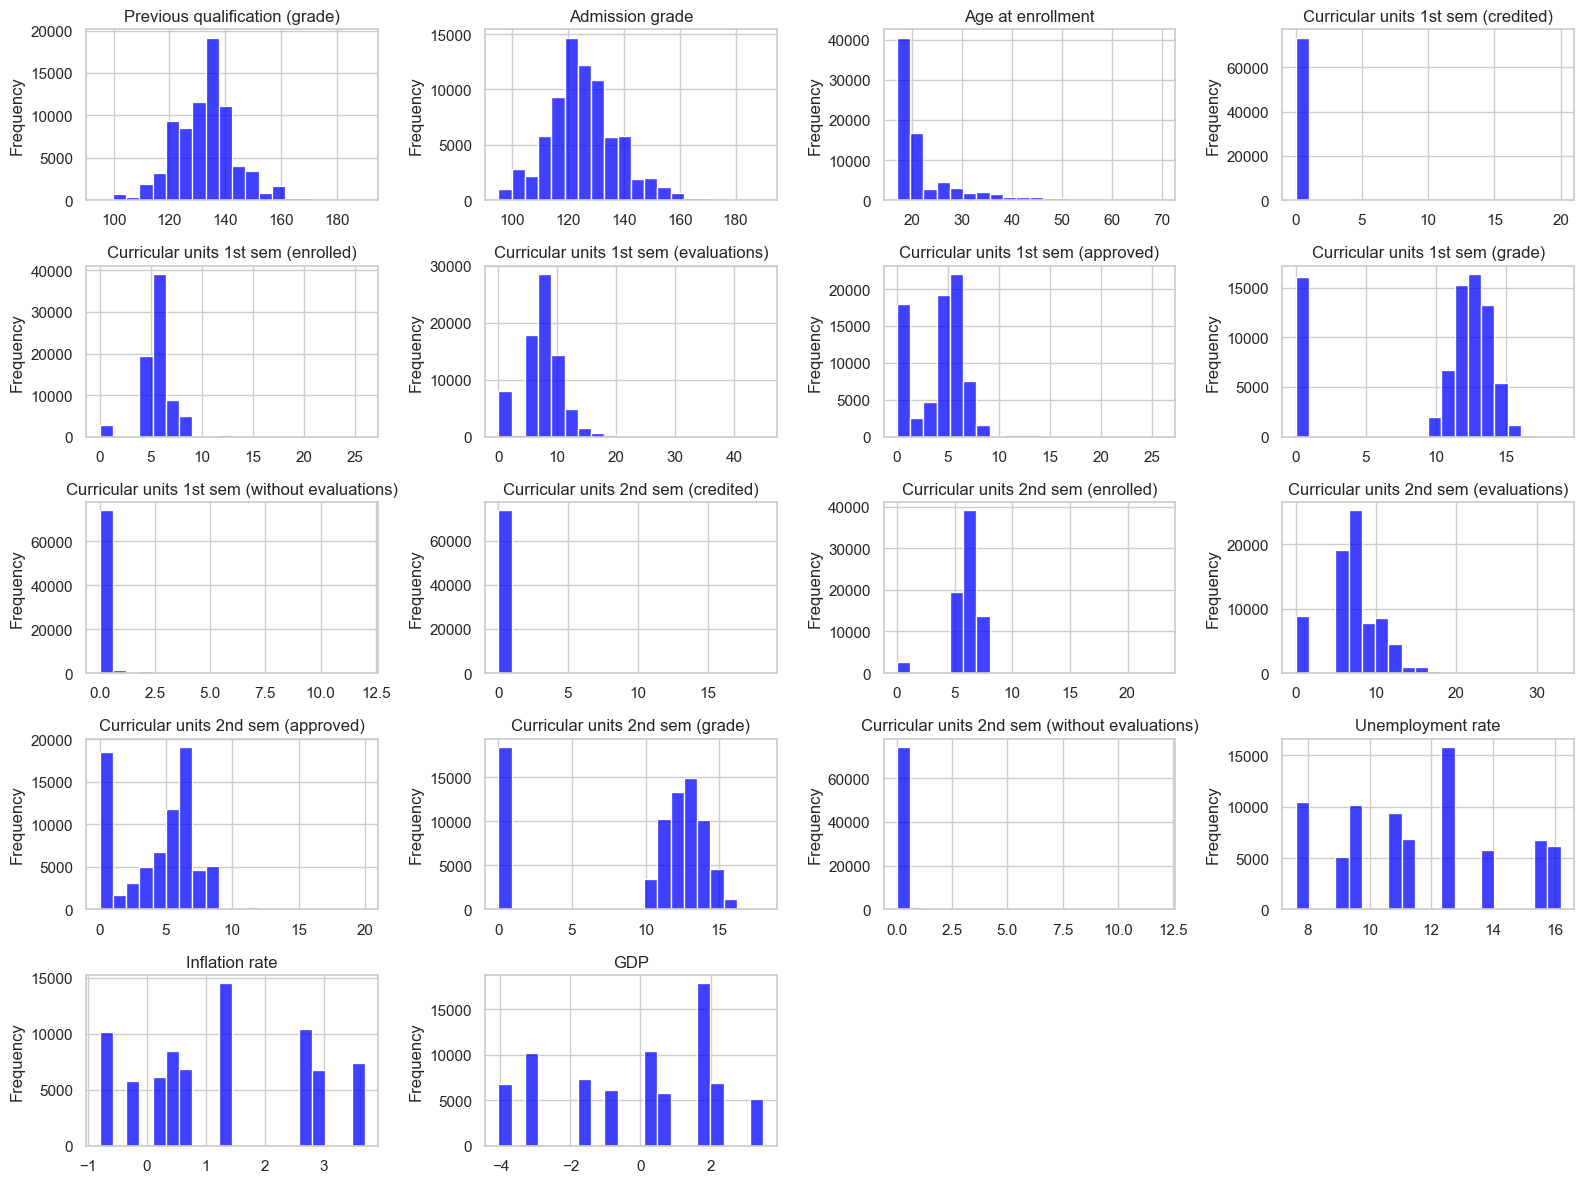

In [10]:
# 设置图形的风格
sns.set(style="whitegrid")

# 设置一个较大的图形尺寸，以容纳所有的直方图
plt.figure(figsize=(16, 12))

# 假设你有不超过20个数值变量，我们使用 5 行 4 列 的布局
rows = 5
columns = 4

# 循环遍历每个数值变量，为每个变量创建一个直方图
for i, column in enumerate(numeric_variables.columns):
    plt.subplot(rows, columns, i + 1)  # 创建子图
    sns.histplot(train_data[column], kde=False, color="blue", binwidth=(train_data[column].max() - train_data[column].min()) / 20)
    plt.title(column)  # 设置标题为变量名
    plt.xlabel('')  # 清除x轴标签（如果需要）
    plt.ylabel('Frequency')  # 设置y轴标签
    plt.tight_layout()  # 调整布局

plt.show()

根据提供的直方图，对数据集中的数值变量分布的描述：

1. **学术性能变量**：直方图显示，像“先前资格成绩”、“入学成绩”、以及课程单元成绩等学术性能指标主要呈现出多峰分布，特别是“先前资格成绩”和“入学成绩”都集中在高分区域，显示学生整体表现较好。此外，“课程单元成绩”在第一学期和第二学期均显示出相似的分布趋势，反映了学生在学期间的一致性表现。

2. **课程单元参与度**：关于课程单元的参与度（如注册、批准、未评估的课程单元数量），直方图显示多数学生在第一学期和第二学期注册和完成的课程单元数量相对集中，大部分学生倾向于选择与规定相符的课程数量。未进行评估的课程单元数量也显示出一定的集中趋势，这可能反映了某些课程或教学活动的特定方面。

3. **经济指标**：“失业率”、“通货膨胀率”和“GDP”的分布则显示出更宽的变化范围，其中“失业率”的直方图显示出较明显的右偏，而“通货膨胀率”和“GDP”则呈现出较为分散的多峰分布。这些经济指标的分布可能与区域或时间跨度的经济波动有关，反映出宏观经济条件对教育背景数据的潜在影响。

这些直方图为进一步分析提供了视觉基础，可用于探讨各变量之间的关系以及它们如何影响学生的学术表现和课程参与度。

使用箱型图来进行可视化：

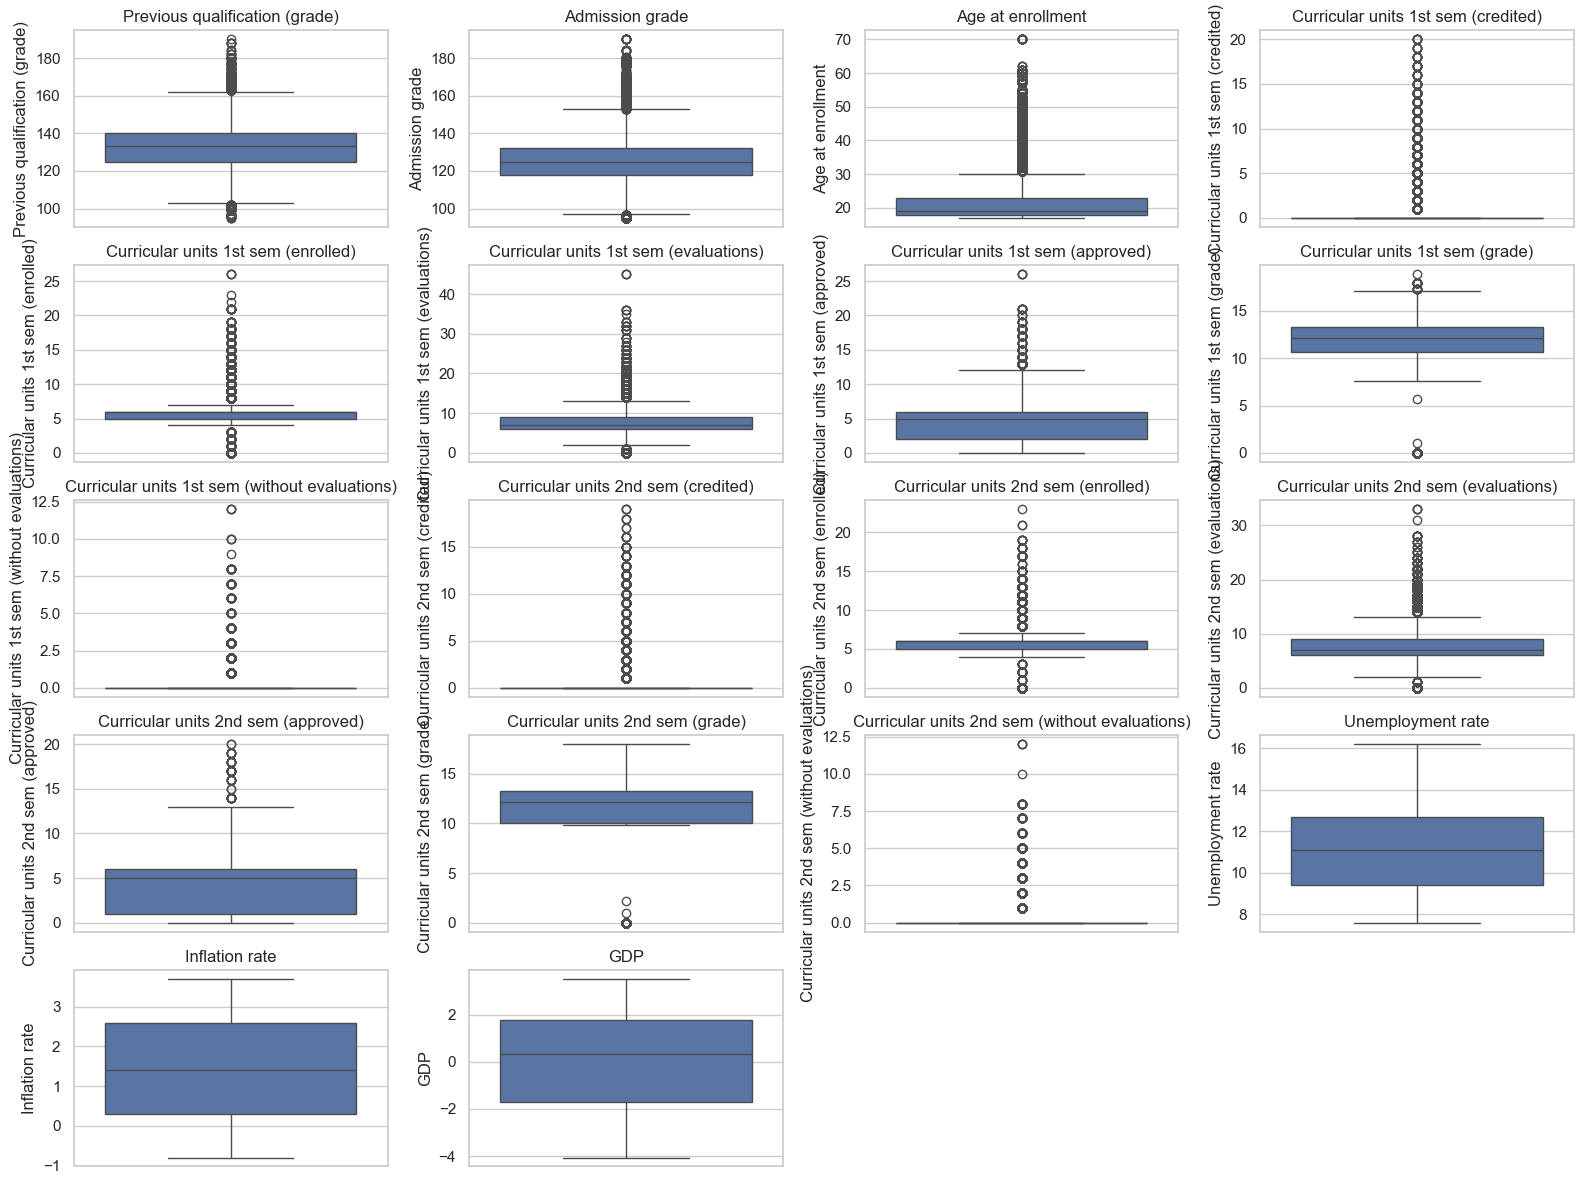

In [11]:
# 设置图形的风格
sns.set(style="whitegrid")

# 设置一个较大的图形尺寸，以容纳所有的箱型图
plt.figure(figsize=(16, 12))

# 对numeric_variables中的每一个数值变量绘制箱型图
for i, column in enumerate(numeric_variables.columns, 1):
    plt.subplot(5, 4, i)  # 假设总共有不超过20个数值变量
    sns.boxplot(y=numeric_variables[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

从箱型图中，我们可以获取到一些关于数据集分布和离群值的有用见解：

1. **学术性能变量**：
   - **先前资格成绩**和**入学成绩**的分布比较集中且对称，主体数据集中在较高分数区间，显示大多数学生的先前学术表现良好。然而，存在一些较低分数的离群值，提示有少数学生可能面临学术挑战。
   - **课程单元成绩**（第一学期和第二学期）大部分集中在较高分数段，尤其是第二学期的成绩分布较为紧凑，说明大多数学生能够顺利通过课程。

2. **课程单元参与度**：
   - **课程单元注册和通过的数量**（第一学期和第二学期）显示出明显的离群点，尤其是在注册数量上，这可能表明有部分学生承担了超过常规学分负担的课程。
   - **没有进行评估的课程单元数量**在第一学期和第二学期都存在离群值，可能是由于某些课程特殊的教学计划或者学生的个别情况造成的。

3. **人口和经济指标**：
   - **年龄分布**在入学时的箱型图显示年龄主要集中在20岁左右，但有从非常年轻到超过60岁的学生，反映出教育机构吸引了广泛年龄层的学生。
   - **失业率**、**通货膨胀率**和**GDP**的分布相对稳定，但GDP的数据显示出了一些异常的经济衰退（负值），这可能反映出数据收集期间的某些特殊经济状况。

这些箱型图不仅展示了各变量的中心趋势和离散程度，还揭示了潜在的数据质量问题或需要进一步探索的领域，例如检查和验证那些极端的离群值背后的原因。

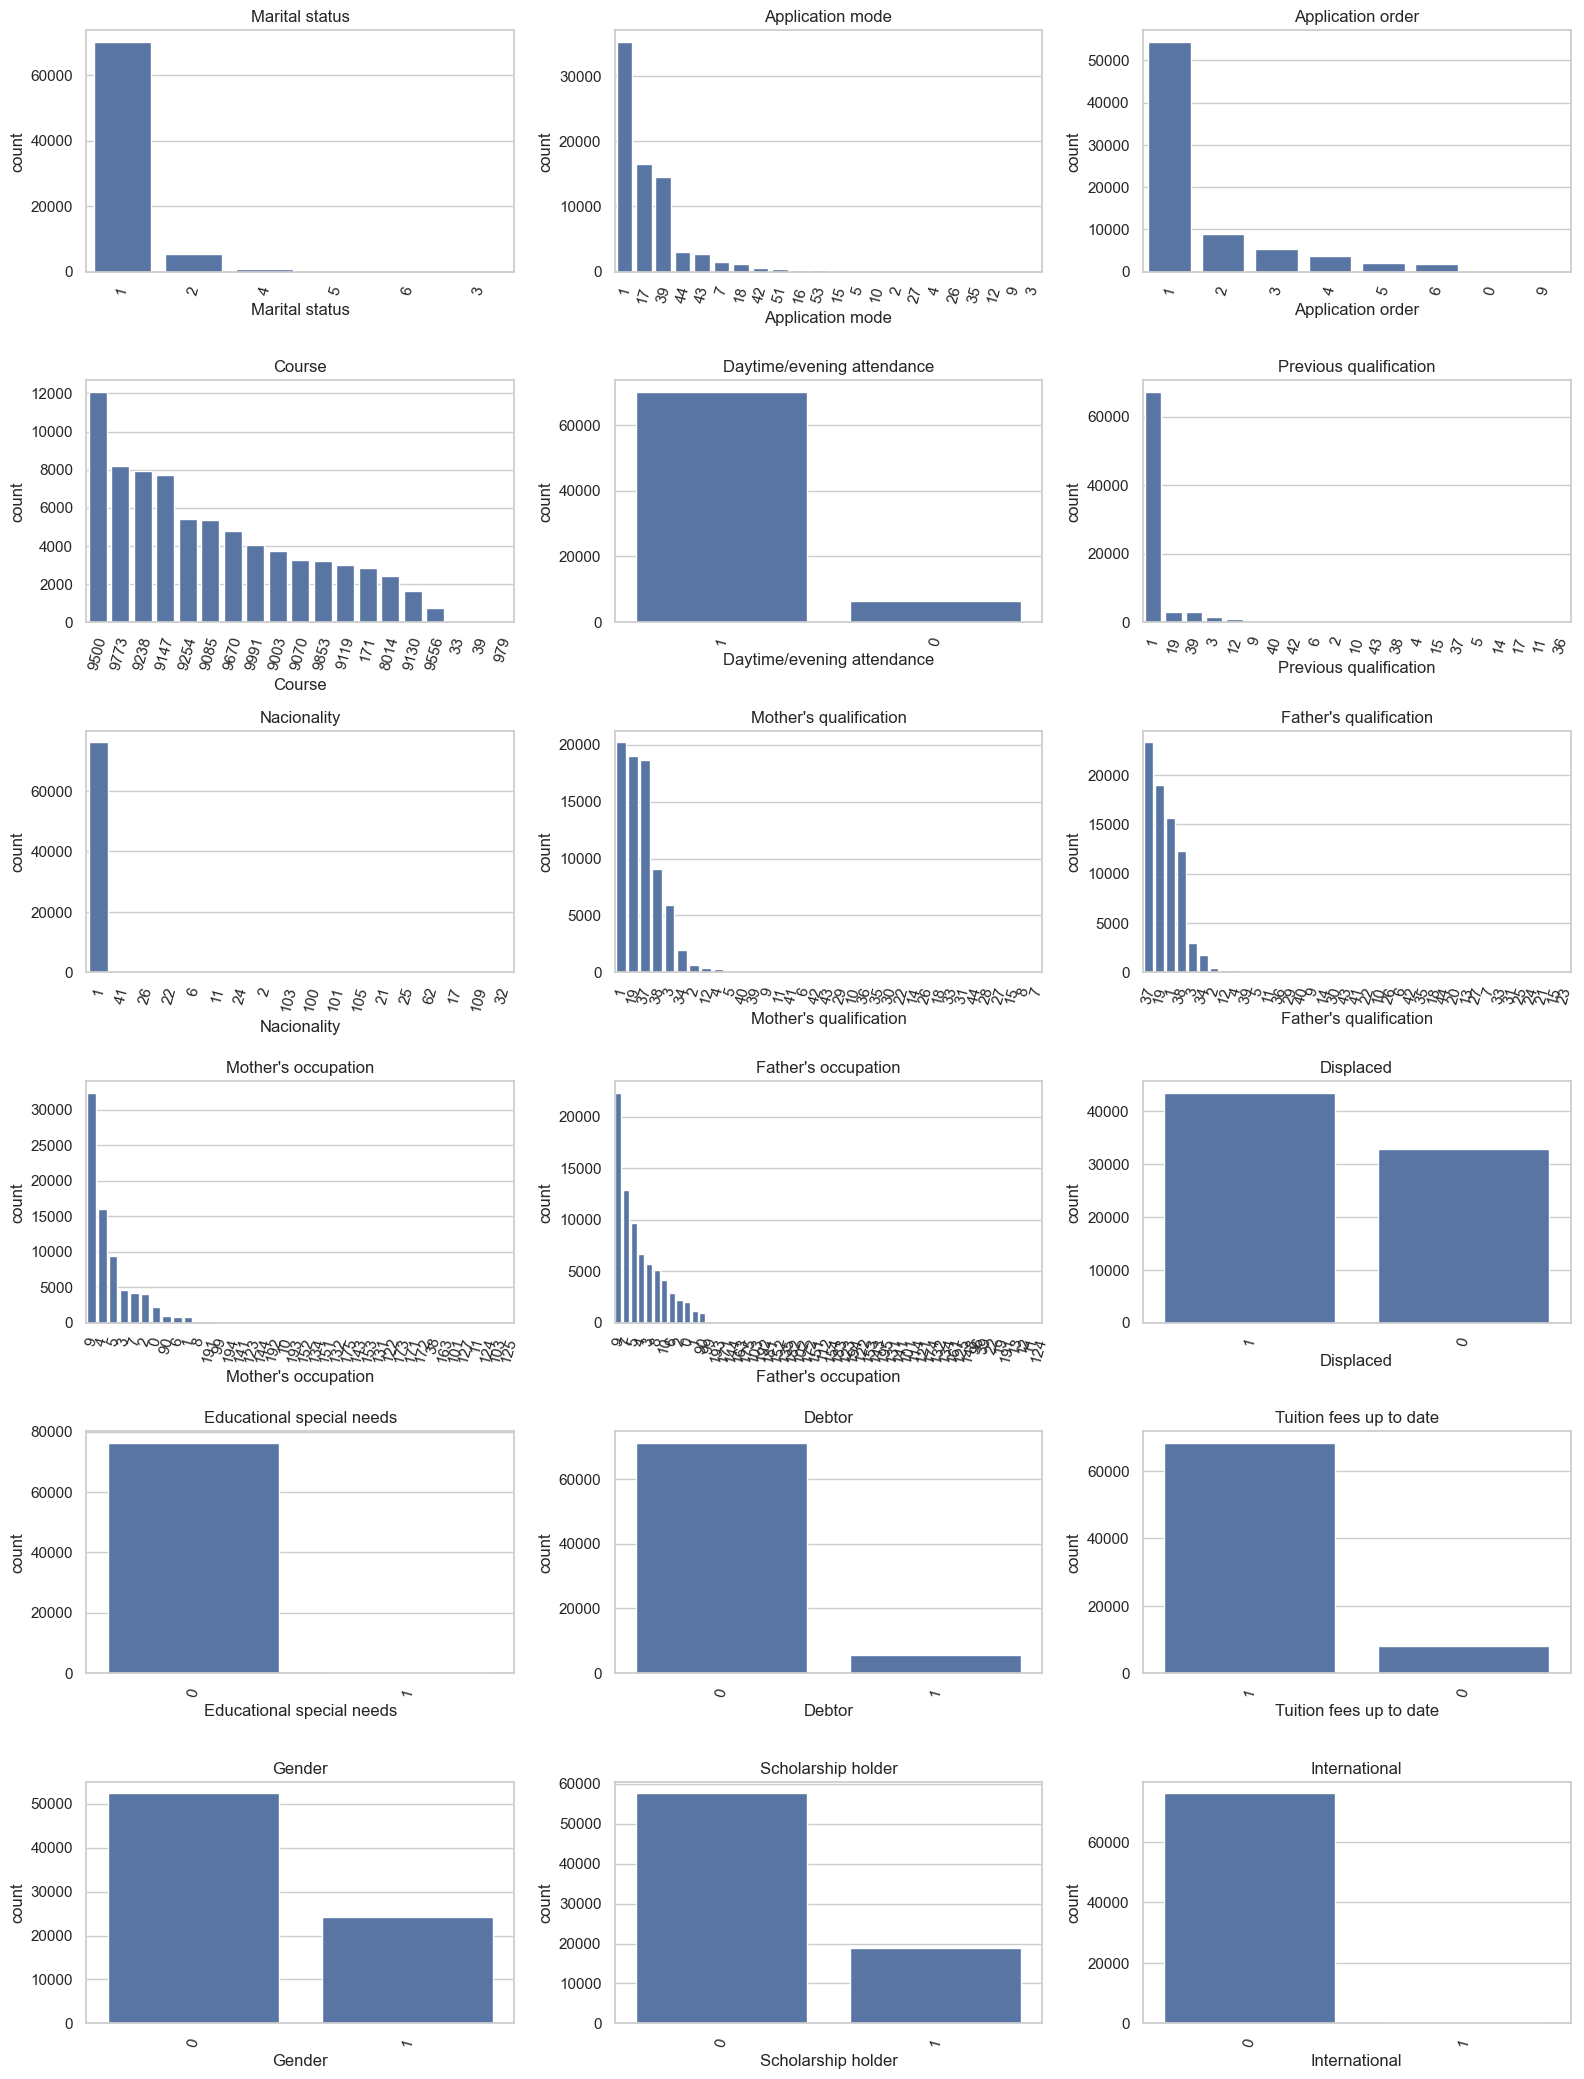

In [12]:
# 设置图形的风格
sns.set(style="whitegrid")

# 绘制直方图，查看每个分类变量的分布
plt.figure(figsize=(16, 24))  # 设置一个较大的图形尺寸以容纳所有的直方图

# 由于分类变量较多，我们可以采用多个子图（subplot）来展示
num_rows = len(categorical_variables.columns) // 3 + 1  # 计算需要多少行，每行放3个图

for i, column in enumerate(categorical_variables.columns, 1):
    plt.subplot(num_rows, 3, i)  # 创建子图
    sns.countplot(x=categorical_variables[column], order=categorical_variables[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=75)  # 旋转x轴标签，以免重叠
    plt.tight_layout()

plt.show()

根据分类变量的条形图，我们可以观察到以下几点：

1. **基本属性和学生背景**：
   - **婚姻状况**和**日间/夜间上课**的分布显示，绝大多数学生未婚且选择日间上课，这可能反映了典型的学生人群趋向于单身且全日制教育。
   - **国籍**条形图揭示了绝大多数学生都是本国国籍，外国学生数量较少。
   - **母亲和父亲的学历**呈现出类似的分布，大多数家长拥有中等或以上级别的教育，但也有显著比例的家长教育水平较低，这可能对学生的学术表现和资源获取产生影响。

2. **课程选择和申请方式**：
   - **课程**的选择显示出一定的多样性，某些课程（如6500, 9123等编号的课程）的报名人数远高于其他课程，表明这些课程可能更受欢迎或更具吸引力。
   - **申请方式**和**申请顺序**的条形图显示，大多数学生的申请都是通过一种主流的方式进行的，并且多数学生将某些课程作为首选，这反映了学生对特定课程的偏好或课程本身的吸引力。

3. **其他个人状况**：
   - **教育特殊需求**、**欠债情况**和**奖学金持有者**的分布表明，绝大部分学生没有教育特殊需求，也没有债务，但有一部分学生获得了奖学金支持。
   - **性别**的分布显示，女性学生略多于男性学生，这可能与教育领域的性别比例趋势相符。
   - **学费到期**的情况显示，大部分学生的学费是最新的，但仍有相当一部分学生的学费未能及时支付，这可能指示经济压力或管理问题。

这些视觉化数据提供了对学生人群的深入洞察，有助于理解学生的背景、课程选择偏好以及潜在的教育挑战，为教育机构提供改进策略和资源分配的依据。

接着来查看一下Target变量的分布：

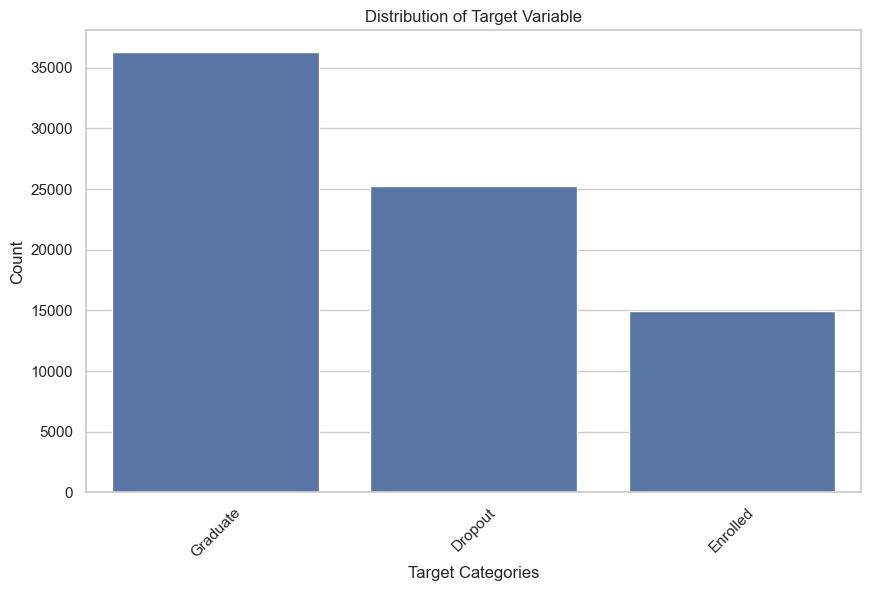

In [13]:
# 设置图形的风格
sns.set(style="whitegrid")

# 绘制直方图查看'Target'变量的分布
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=train_data, order = train_data['Target'].value_counts().index)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 旋转x轴标签以提高可读性
plt.show()

大多数学生属于“Dropout”（辍学）类别，其次是“Graduate”（毕业）类别，而“Enrolled”（在读）类别的学生数量最少。

这种分布可能反映了学生在教育过程中面临的挑战，特别是辍学率较高，提示可能存在学业支持、学生服务或课程相关的问题需要解决，以增加学生的留存率和毕业率。

因为存在着不少分类变量，我们还可以查看分类变量中每个类别的分布情况：

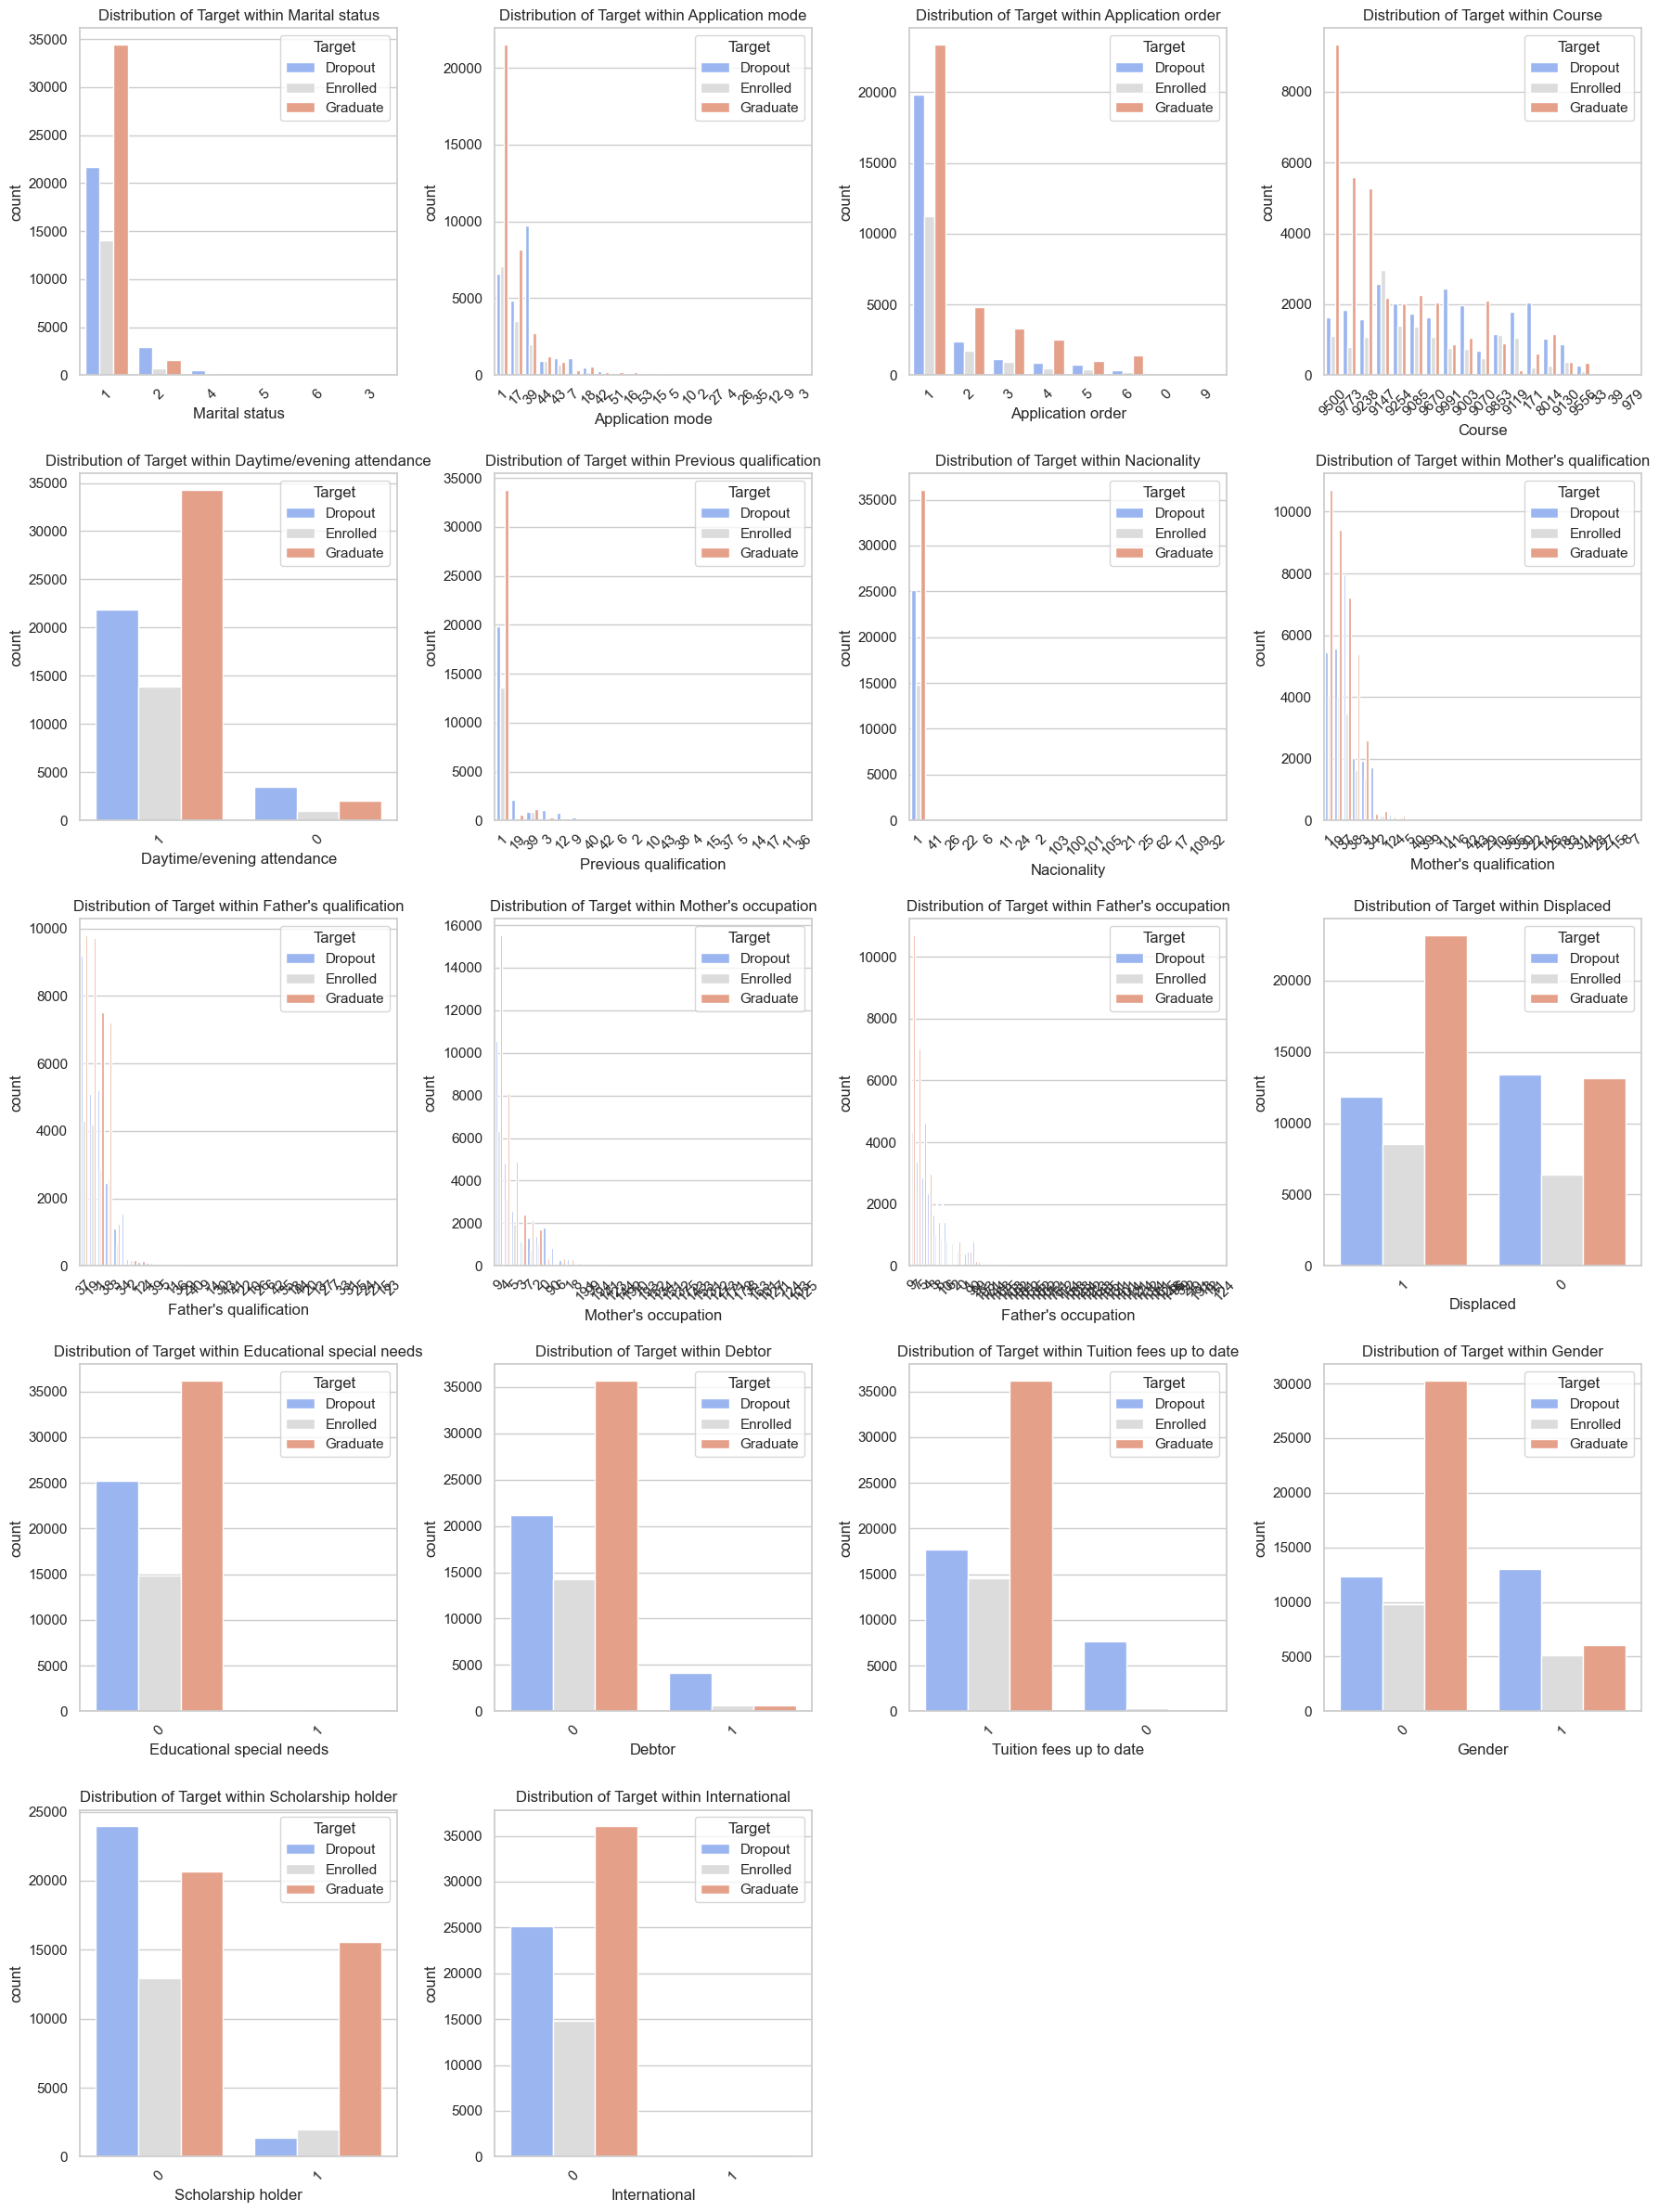

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形的风格
sns.set(style="whitegrid")

# 创建一个大的图形，足以展示多个条形图
plt.figure(figsize=(18, 24))

# 循环遍历每个分类变量并创建一个分组条形图
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(5, 4, i)  # 调整网格大小以适应所有图表
    sns.countplot(x=var, hue='Target', data=train_data, palette='coolwarm', order=train_data[var].value_counts().index)
    plt.title(f'Distribution of Target within {var}')
    plt.xticks(rotation=45)  # 旋转标签以提高可读性
    plt.tight_layout()

plt.show()

另一个更好的可视化是采用stack bar/hist 来进行表示：

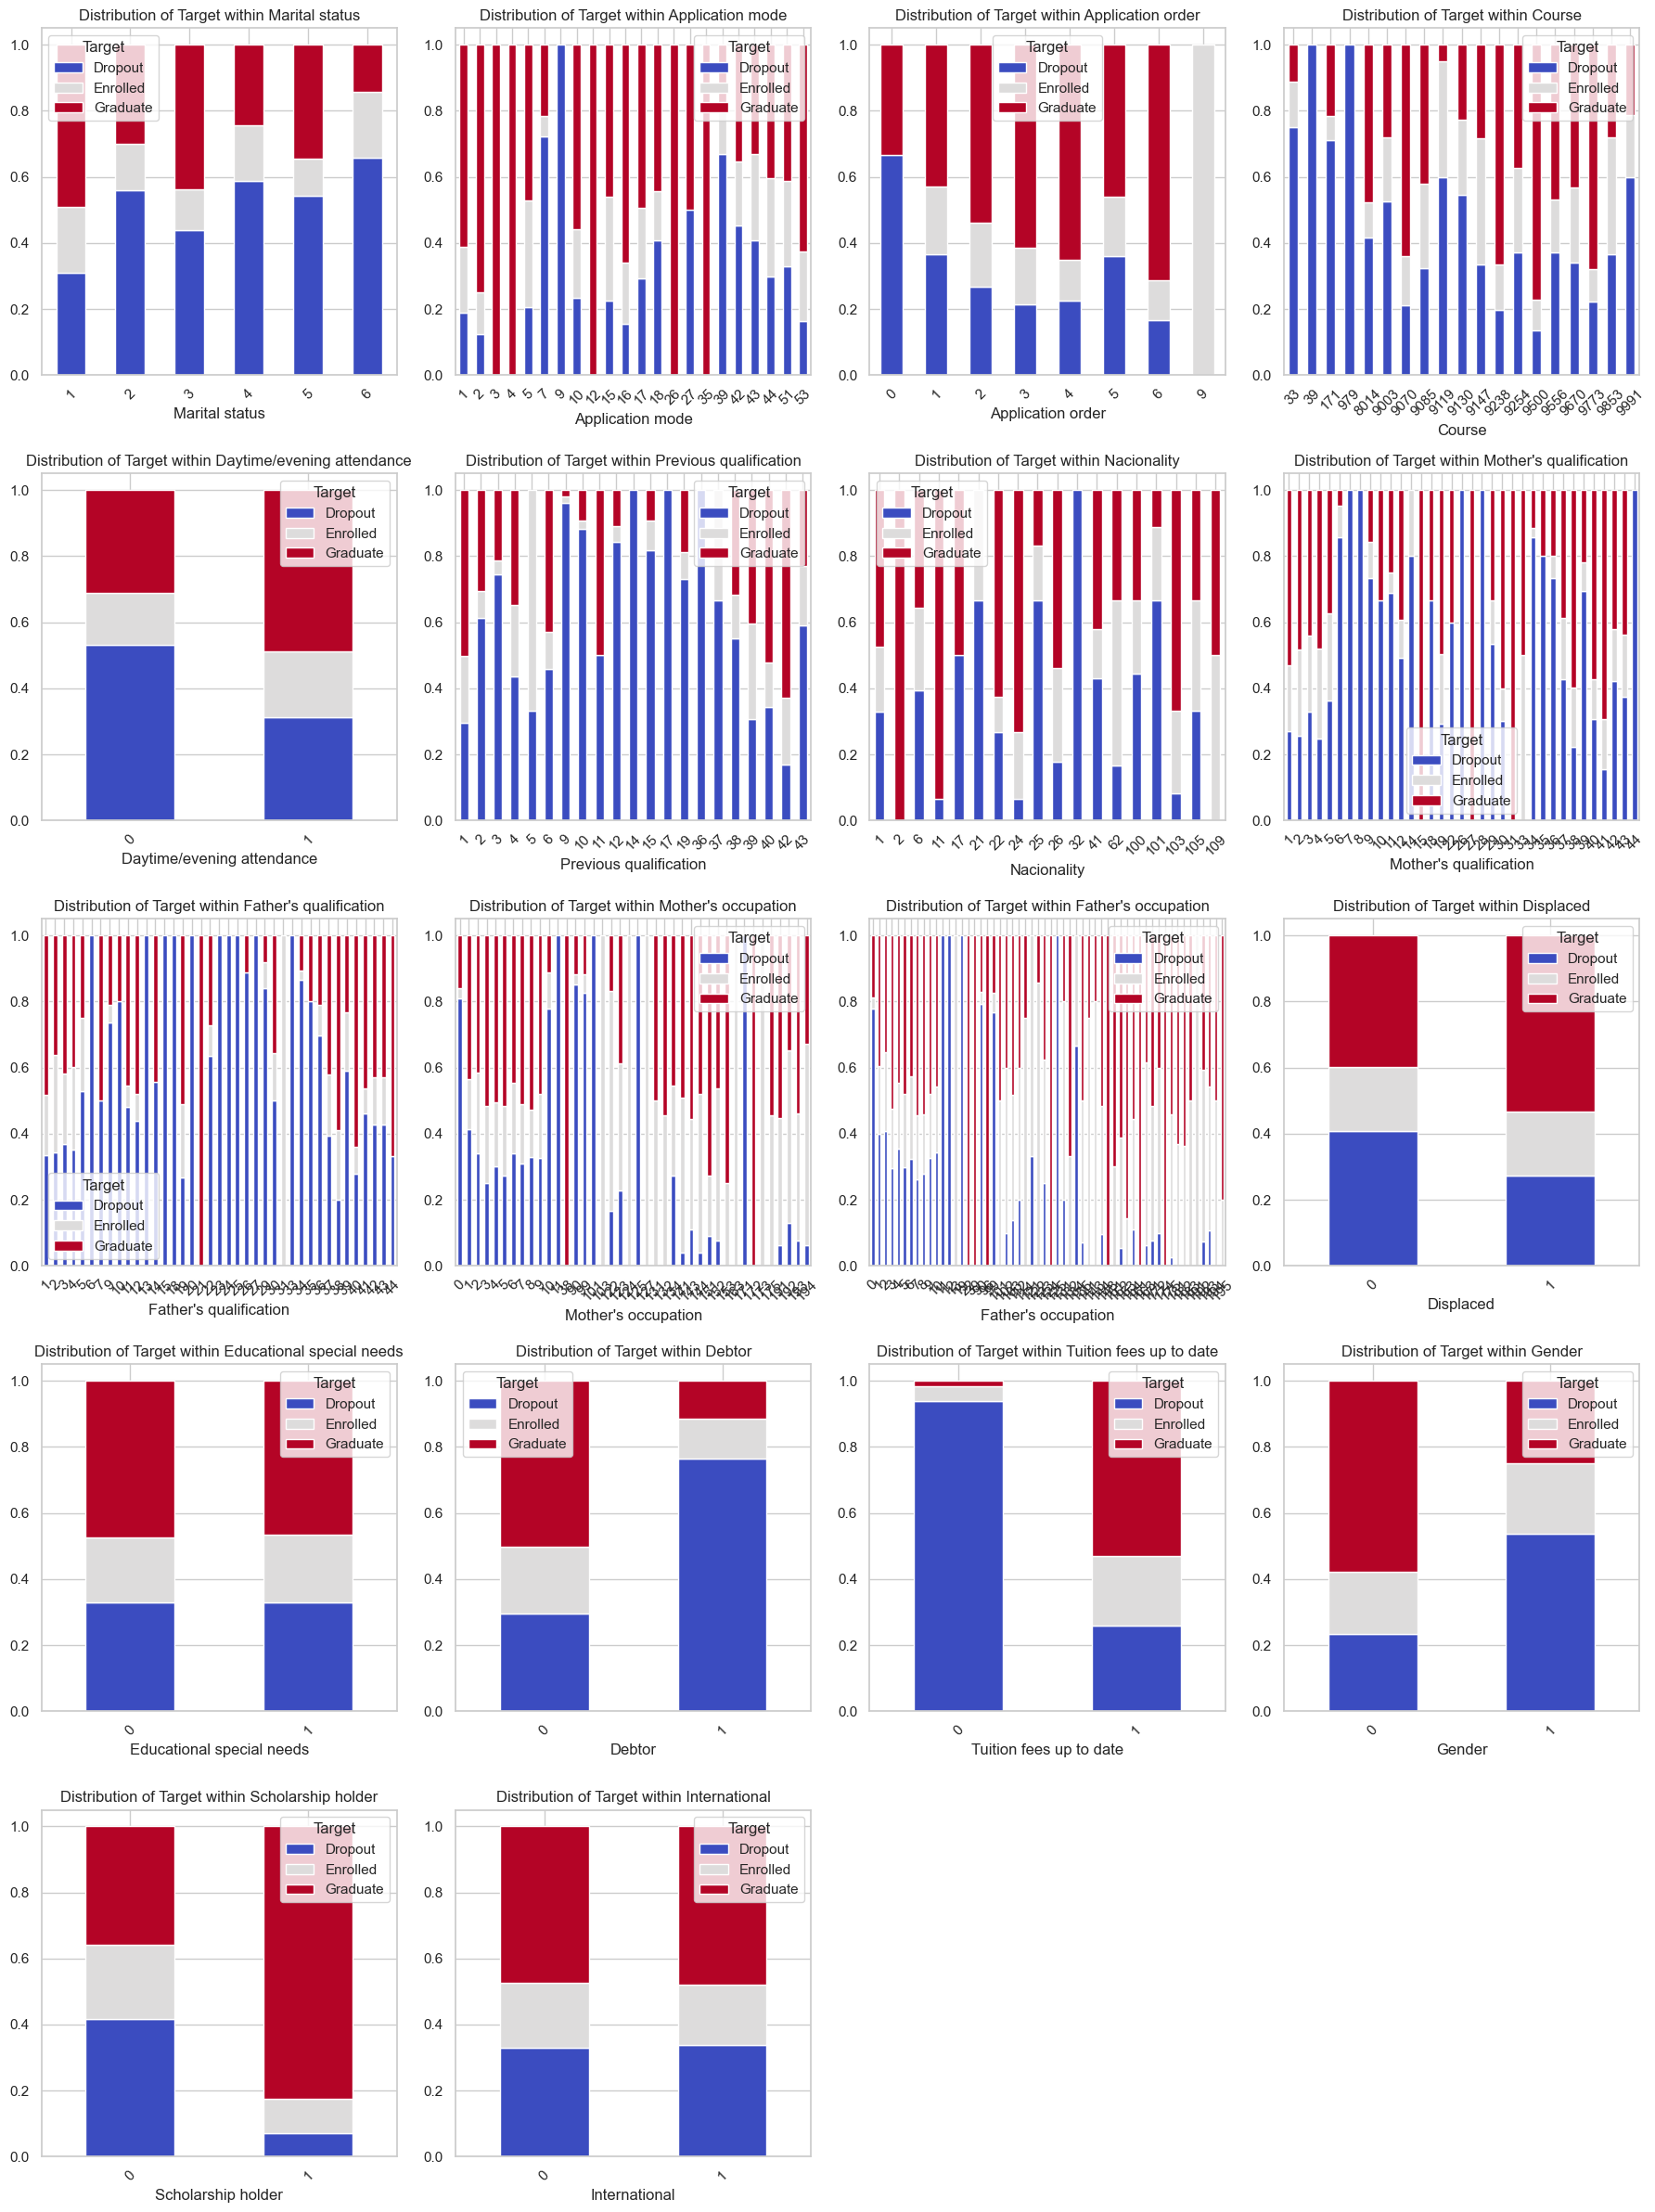

In [15]:
# 设置图形的风格
sns.set(style="whitegrid")

# 创建一个大的图形，足以展示多个条形图
plt.figure(figsize=(18, 24))

# 循环遍历每个分类变量并创建一个分组条形图
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(5, 4, i)  # 调整网格大小以适应所有图表
    # 使用crosstab计算每个分类变量的目标分布
    crosstab = pd.crosstab(train_data[var], train_data['Target'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm')
    plt.title(f'Distribution of Target within {var}')
    plt.xticks(rotation=45)  # 旋转标签以提高可读性
    plt.tight_layout()

plt.show()

这组图表展示了不同分类变量内学生的学业状态（辍学、在读、毕业）的分布情况，提供了关于学生背景与其学业成果之间的见解：

1. **婚姻状况与学业**：大多数未婚学生辍学率较高，而已婚学生中毕业的比例显著。这可能反映了已婚学生可能拥有更稳定的个人生活环境，从而有利于完成学业。

2. **上课时间（日间/夜间）**：日间上课的学生辍学率明显高于夜间上课的学生，而夜间学生的毕业率则相对较高。这可能说明夜间课程的学生能更好地平衡工作和学习，或者夜间课程可能为学生提供了更多支持。

3. **申请顺序**：将课程作为首选的学生辍学率最低，毕业率最高，表明高意愿选择的学生更有可能坚持到最后。这强调了学生对课程选择的投入程度与其学业成功之间的关系。

4. **国籍**：本国学生的辍学率高于国际学生，国际学生的毕业率也较高。这可能反映国际学生有更高的动机和更多资源支持其完成学业。

5. **被置换学生**：被置换的学生辍学率略低于未被置换的学生，但在毕业率上没有显著差异。这可能表明置换程序对帮助学生留在学校有一定的正面影响。

6. **经济因素（学费支付情况、奖学金持有）**：学费未到期的学生辍学率高，表明经济压力是导致学生辍学的重要因素。同时，奖学金持有者的辍学率较低，毕业率较高，突显了经济支持对学业成功的重要性。

7. **性别和教育特殊需求**：性别分布中，男性学生辍学率略高于女性。教育特殊需求的学生辍学率明显高于非特殊需求学生，这表明对这一群体的支持可能不足。

这些发现强调了学生个人背景和外部条件对其教育结果的重要影响，为教育机构在制定支持措施和资源分配策略时提供了重要的视角。

# 特征工程

首先是查看numerical variables之间的相关性：

In [16]:
corr_matrix = numeric_variables.corr()

In [17]:
corr_matrix

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Previous qualification (grade),1.000000,0.561483,-0.106581,0.000223,0.017958,-0.061582,0.104006,0.079656,0.000599,-0.000320,0.030076,-0.048591,0.121827,0.089353,-0.011397,0.052112,0.028678,-0.053731
Admission grade,0.561483,1.000000,-0.107903,0.051245,-0.016831,-0.067938,0.140220,0.119048,-0.000131,0.045671,-0.016530,-0.048241,0.154232,0.135208,-0.013064,0.029367,-0.015950,-0.018837
Age at enrollment,-0.106581,-0.107903,1.000000,0.122159,0.011152,0.019878,-0.277059,-0.288354,0.036600,0.111891,-0.021518,-0.043200,-0.293103,-0.304133,0.046132,0.016703,0.052049,-0.092859
Curricular units 1st sem (credited),0.000223,0.051245,0.122159,1.000000,0.549256,0.332080,0.356888,0.080462,0.041958,0.933935,0.421179,0.264235,0.270014,0.083428,0.022417,0.025980,0.005707,-0.005943
Curricular units 1st sem (enrolled),0.017958,-0.016831,0.011152,0.549256,1.000000,0.484462,0.599526,0.388141,0.021245,0.531755,0.956321,0.459693,0.548000,0.374975,0.006231,0.082129,0.016110,0.014017
Curricular units 1st sem (evaluations),-0.061582,-0.067938,0.019878,0.332080,0.484462,1.000000,0.418769,0.500855,0.120004,0.317123,0.437354,0.786699,0.354304,0.429139,0.077303,0.029569,-0.031528,-0.044140
Curricular units 1st sem (approved),0.104006,0.140220,-0.277059,0.356888,0.599526,0.418769,1.000000,0.839860,-0.055343,0.345784,0.590151,0.484930,0.922657,0.830430,-0.065043,0.055241,-0.043474,0.093272
Curricular units 1st sem (grade),0.079656,0.119048,-0.288354,0.080462,0.388141,0.500855,0.839860,1.000000,-0.035564,0.073241,0.401075,0.553566,0.787559,0.889393,-0.043324,0.005159,-0.045295,0.098482
Curricular units 1st sem (without evaluations),0.000599,-0.000131,0.036600,0.041958,0.021245,0.120004,-0.055343,-0.035564,1.000000,0.042009,0.011253,0.060928,-0.055103,-0.040058,0.446286,-0.044933,-0.071368,-0.116242
Curricular units 2nd sem (credited),-0.000320,0.045671,0.111891,0.933935,0.531755,0.317123,0.345784,0.073241,0.042009,1.000000,0.429930,0.260298,0.278520,0.079910,0.025959,0.023759,0.006441,-0.008124


使用热力图来进行可视化：

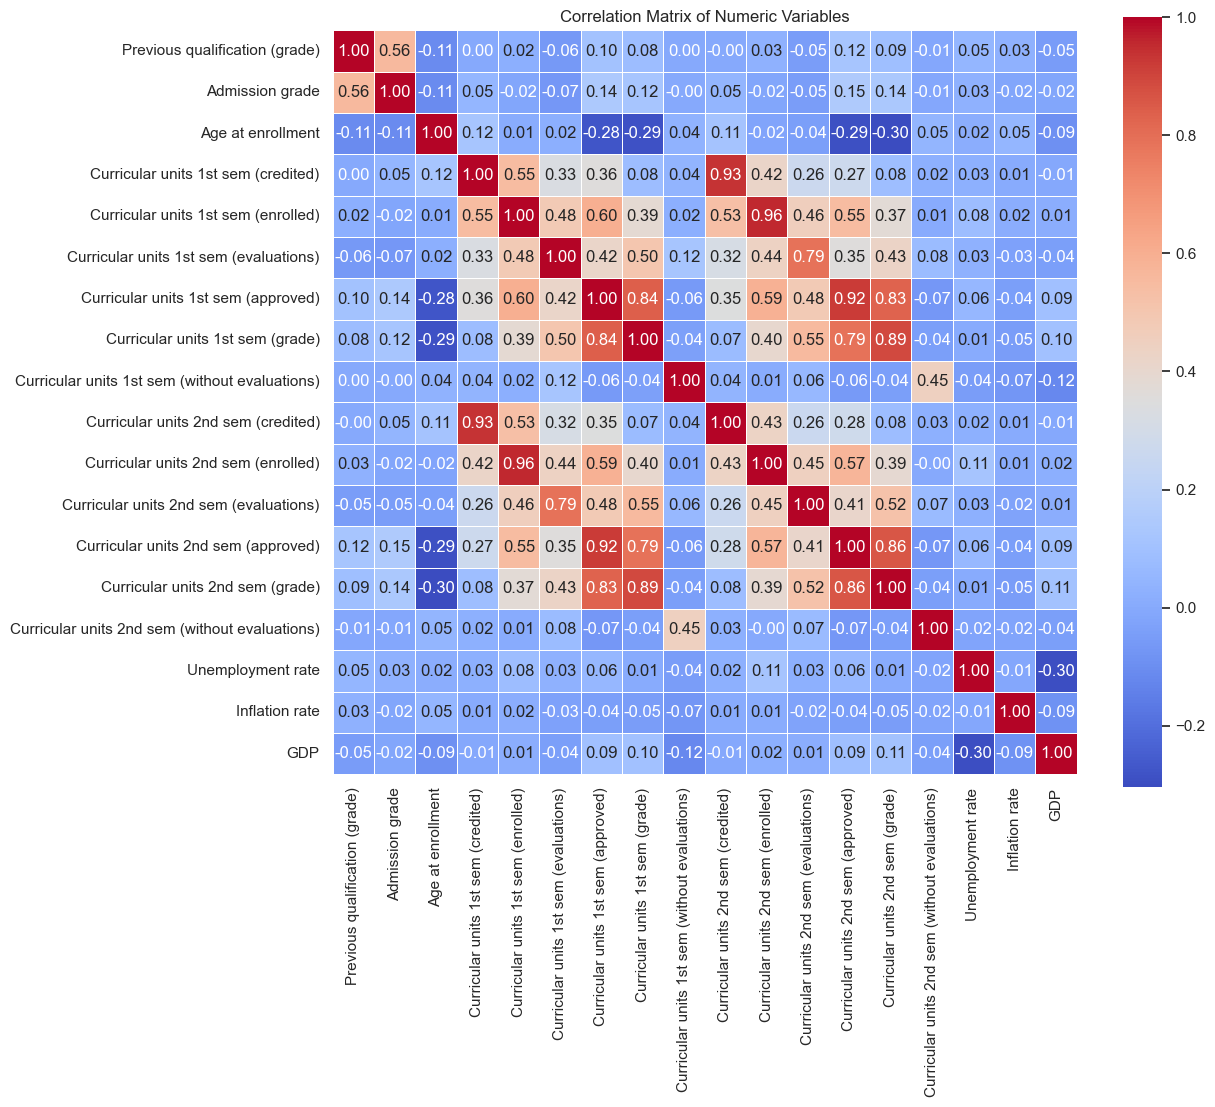

In [18]:
# 使用 seaborn 创建热图
plt.figure(figsize=(12, 10))  # 可以根据需要调整图形尺寸
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

找出所有的相关性在0.7或者以上的变量对：

In [19]:
# 获取上三角矩阵（不包括对角线）
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 堆叠成一个 Series
stacked = upper_tri.stack()

# 找出相关性大于等于 0.7 的对
high_corr = stacked[stacked >= 0.7]

# 输出结果
for (var1, var2), corr in high_corr.items():
    print(f"Variables '{var1}' and '{var2}' 's correlation coefficient value is:  {corr:.2f}")

Variables 'Curricular units 1st sem (credited)' and 'Curricular units 2nd sem (credited)' 's correlation coefficient value is:  0.93
Variables 'Curricular units 1st sem (enrolled)' and 'Curricular units 2nd sem (enrolled)' 's correlation coefficient value is:  0.96
Variables 'Curricular units 1st sem (evaluations)' and 'Curricular units 2nd sem (evaluations)' 's correlation coefficient value is:  0.79
Variables 'Curricular units 1st sem (approved)' and 'Curricular units 1st sem (grade)' 's correlation coefficient value is:  0.84
Variables 'Curricular units 1st sem (approved)' and 'Curricular units 2nd sem (approved)' 's correlation coefficient value is:  0.92
Variables 'Curricular units 1st sem (approved)' and 'Curricular units 2nd sem (grade)' 's correlation coefficient value is:  0.83
Variables 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (approved)' 's correlation coefficient value is:  0.79
Variables 'Curricular units 1st sem (grade)' and 'Curricular units 2nd s

从提供的相关性分析结果中，我们可以看到几对变量之间存在着非常高的相关性。这些高度的相关性揭示了学生在不同学期之间在学业表现、课程注册、评估和成绩方面的一致性和持续性。以下是对这些结果的解释和它们可能的意义：

1. **课程注册量（第一学期与第二学期）**：
   - 相关系数为0.96，显示第一学期和第二学期中学生注册的课程数量之间的非常强的一致性。这表明大多数学生在整个学年中保持相似的课程负荷，可能受到课程结构和学期要求的影响。

2. **课程评估次数（第一学期与第二学期）**：
   - 相关系数为0.79，表明评估次数在连续学期间也相对稳定。这可能意味着课程的评估结构（如考试和作业的频率）在学年内保持一致。

3. **课程通过率与课程成绩（第一学期）**：
   - 相关系数为0.84，说明学生在课程中的表现（即成绩）与他们通过课程的能力（即课程通过率）高度相关。通常，成绩好的学生在课程中的通过率也高。

4. **课程通过率（第一学期与第二学期）**：
   - 相关系数为0.92，这是一个非常高的相关性，显示学生在第一学期的表现与第二学期在通过课程方面的表现密切相关。这可能反映了学生的学习习惯和努力程度在学年内的持续性。

5. **第一学期的课程通过率与第二学期的课程成绩**：
   - 相关系数为0.83，表明第一学期的课程通过率与第二学期的课程成绩密切相关，说明学生的学业表现具有连续性和可预测性。

6. **课程成绩与通过率（第二学期）**：
   - 相关系数为0.86，进一步强调了成绩与通过率之间的密切联系，指出学生在课程中获得高分通常也意味着他们能成功完成课程。

7. **课程成绩（第一学期与第二学期）**：
   - 相关系数为0.89，显示学生在学年内的学习成绩具有很高的一致性，这可能与他们的学习态度、资源可用性和教学质量有关。

从train_data中删除这些变量：

In [20]:
# 定义要删除的变量列表
variables_to_remove = [
    'Curricular units 2nd sem (enrolled)',   # 删除此变量因为与'Curricular units 1st sem (enrolled)'相关系数为0.96
    'Curricular units 2nd sem (evaluations)', # 删除此变量因为与'Curricular units 1st sem (evaluations)'相关系数为0.79
    'Curricular units 2nd sem (approved)',    # 删除此变量因为与'Curricular units 1st sem (approved)'相关系数为0.92
    'Curricular units 2nd sem (grade)',       # 删除此变量因为与'Curricular units 1st sem (grade)'相关系数为0.89
    'Curricular units 1st sem (enrolled)',    # 删除此变量因为与'Curricular units 1st sem (credited)'可能显示出高度相关（预期>0.9）
    'Curricular units 1st sem (approved)'     # 删除此变量因为与'Curricular units 1st sem (grade)'相关系数为0.84
]

# 删除这些变量
train_data = train_data.drop(columns=variables_to_remove)

In [21]:
# 查看一下
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   id                                              76518 non-null  int64   
 1   Marital status                                  76518 non-null  category
 2   Application mode                                76518 non-null  category
 3   Application order                               76518 non-null  category
 4   Course                                          76518 non-null  category
 5   Daytime/evening attendance                      76518 non-null  category
 6   Previous qualification                          76518 non-null  category
 7   Previous qualification (grade)                  76518 non-null  float64 
 8   Nacionality                                     76518 non-null  category
 9   Mother's qualification      

接着查看categorical variables之间的相关性，由于categorical variables中的变量都是分类变量，所以这里使用Cramér's V方法，该方法对于任何形式的分类变量（无论是有序还是无序）都很适合，并且能提供一个0到1之间的相关性度量，其中1表示完全相关，0表示无相关。

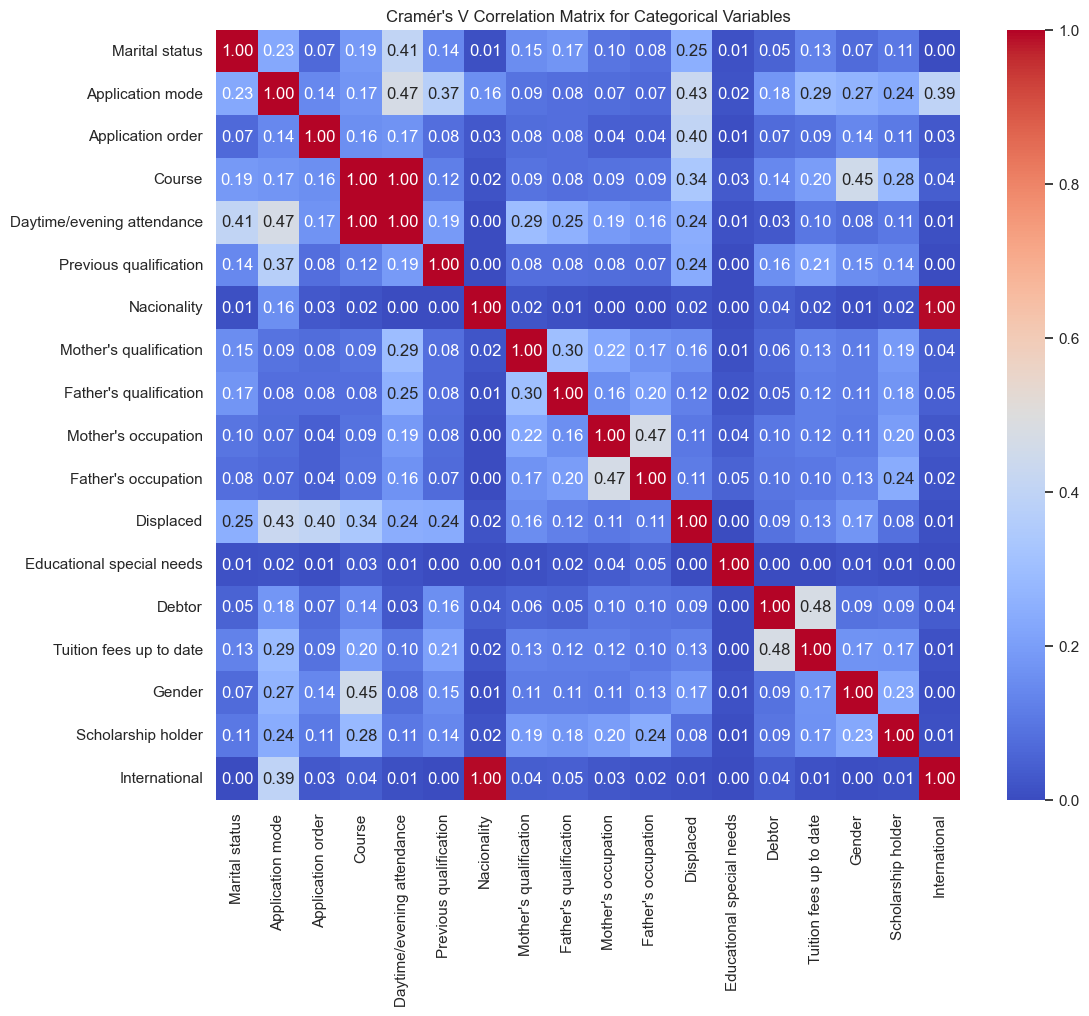

In [22]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 假设 categorical_variables 是包含分类变量的DataFrame
cols = categorical_variables.columns
corr_matrix = pd.DataFrame(index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        corr_matrix.loc[col1, col2] = cramers_v(categorical_variables[col1], categorical_variables[col2])

# 将相关系数矩阵的值转换为浮点数，以便绘图
corr_matrix = corr_matrix.astype(float)

# 使用 seaborn 绘制热图
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cramér\'s V Correlation Matrix for Categorical Variables')
plt.show()

可以发现大部分的分类变量之间的相关性都非常的低，但是存在着几个变量之间的相关性达到了100%：

In [23]:
# 获取上三角矩阵（不包括对角线）
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 堆叠成一个 Series
stacked = upper_tri.stack()

# 找出相关性大于等于 0.7 的对
high_corr = stacked[stacked >= 0.7]

# 输出结果
for (var1, var2), corr in high_corr.items():
    print(f"Variables '{var1}' and '{var2}' 's correlation coefficient value is:  {corr:.2f}")

Variables 'Course' and 'Daytime/evening attendance' 's correlation coefficient value is:  1.00
Variables 'Nacionality' and 'International' 's correlation coefficient value is:  1.00


可以认为这些变量对中的一者其实是另一者的属性或者不同的表达方式，因此选择删除掉一些变量：

In [24]:
# 定义要删除的变量列表
variables_to_remove = [
    'Daytime/evening attendance',
    'International'
]

# 删除这些变量
train_data = train_data.drop(columns=variables_to_remove)

接着需要对数据集中的categorical variables进行独热编码，许多机器学习算法，特别是那些基于数学运算的算法（如线性回归、逻辑回归、支持向量机等），都预期输入数据为数值型。分类变量如果保留为标签（如字符串），这些算法无法直接处理。

In [25]:
# 首先，选择需要独热编码的列，即所有分类变量的列（排除 'Target' 列）
categorical_cols = train_data.select_dtypes(include=['category']).columns.tolist()
categorical_cols.remove('Target')  # 移除目标变量 'Target'

# 使用 pd.get_dummies() 对分类变量进行独热编码
train_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

至此，已经完成了train_data的数据集的探索和特征工程，接下来就是使用数据集来训练分类模型，并且进行评估。

# 分类模型

## 数据集的拆分

数据集拆分为三个部分：

1. train_data：大约70%的部分，用来训练模型
2. val_data：大约10%的部分，用来验证模型的表现
3. test_data：大约20%的部分，用来测试最终训练出来的模型

In [26]:
from sklearn.model_selection import train_test_split

# 假设 train_data 是你的原始数据框
# 首先去掉 'id' 列
train_data = train_data.drop(columns=['id'])

# 分离特征和目标变量
X = train_data.drop(columns=['Target'])
y = train_data['Target']

# 首先分割出20%作为测试集
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 从剩余的80%中分割出12.5%作为验证集，这样验证集占原始数据的10%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 x 0.8 = 0.1

In [27]:
# 组合特征和目标变量回到各自的数据集中
train_sub_data = pd.concat([X_train, y_train], axis=1)
train_val_data = pd.concat([X_val, y_val], axis=1)
train_test_data = pd.concat([X_test, y_test], axis=1)

In [28]:
# 可以打印出每个数据集的行数来确认比例
print(f"Train Data Size: {train_sub_data.shape[0]} rows")
print(f"Validation Data Size: {train_val_data.shape[0]} rows")
print(f"Test Data Size: {train_test_data.shape[0]} rows")

Train Data Size: 53562 rows
Validation Data Size: 7652 rows
Test Data Size: 15304 rows


## 逻辑回归模型

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [30]:
# 分离特征和目标变量
X_train = train_sub_data.drop('Target', axis=1)
y_train = train_sub_data['Target']

X_val = train_val_data.drop('Target', axis=1)
y_val = train_val_data['Target']

In [31]:
# 数据标准化及逻辑回归模型的管道
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

In [32]:
# 参数网格
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [33]:
# 创建GridSearchCV对象
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# 在训练数据上训练
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [34]:
# 打印最佳参数
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'classifier__C': 100, 'classifier__penalty': 'l1'}
Best cross-validated accuracy: 0.7543594372474809


开始在验证集上面验证模型的性能：

In [35]:
from sklearn.metrics import classification_report, accuracy_score

# 使用最优参数在验证集上预测
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_val)

# 评估模型
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.7545739675901725
              precision    recall  f1-score   support

     Dropout       0.86      0.76      0.81      2566
    Enrolled       0.54      0.35      0.43      1495
    Graduate       0.75      0.92      0.82      3591

    accuracy                           0.75      7652
   macro avg       0.72      0.68      0.69      7652
weighted avg       0.75      0.75      0.74      7652



从逻辑回归模型在验证数据集上的表现来看，模型达到了75.46%的总体准确率，显示出在预测学生的学业状态（辍学、在读、毕业）上具备相对可靠的能力。这个准确率虽然不算极高，但表明在多数情况下，模型能够正确判断学生的状态。

在各个类别的具体表现中，模型对“辍学”状态的识别相对最为准确，其精确度达到了86%且召回率为76%，f1-score为0.81，说明模型能够较好地识别出辍学学生，且较少将非辍学学生误分类为辍学。然而，对于“在读”学生的预测表现较弱，只有54%的精确度和35%的召回率，f1-score仅为0.43。这表明模型在确定学生是否还在学习过程中时存在明显的困难，很多实际在读的学生可能被误判为其他状态。对于“毕业”学生，模型的表现再次提升，精确度为75%，召回率高达92%，f1-score达到了0.82，显示模型在识别已经完成学业的学生上表现出较高的准确性和较少的遗漏。

整体而言，模型在各类评分指标上表现出一定的均衡性。宏观平均和加权平均的评分考虑了不同类别的重要性和样本量的不均衡，从中可以看出，尽管模型在“辍学”和“毕业”状态的预测上表现较好，但“在读”状态的较差表现拉低了整体的评分。这种情况提示我们，可能需要对模型进行进一步的优化，例如通过引入更多有区分力的特征、尝试不同的算法或调整模型参数，或者实施如过采样少数类别等不平衡数据处理技术，以提高“在读”类别的预测准确性。

最后放到验证集上面进行测试，查看性能如何：

In [36]:
X_test = train_test_data.drop('Target', axis=1)
y_test = train_test_data['Target']

接着使用之前训练出来的最佳模型：

In [37]:
# 使用之前找到的最佳模型来进行预测
y_pred_test = best_clf.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))

Test Accuracy: 0.755684788290643
              precision    recall  f1-score   support

     Dropout       0.86      0.76      0.81      5028
    Enrolled       0.54      0.34      0.41      3017
    Graduate       0.75      0.92      0.83      7259

    accuracy                           0.76     15304
   macro avg       0.72      0.67      0.68     15304
weighted avg       0.74      0.76      0.74     15304



准确率为75.57%，表明模型在预测学生的学业状态（辍学、在读、毕业）方面有较好的表现。这个准确率接近验证集上的表现，说明模型在未见数据上的预测能力是稳定的。

辍学 (Dropout)：模型在预测辍学学生时表现最好，精确度高达86%，召回率为76%，f1-score为0.81。这表明模型能有效识别大部分辍学学生，同时将辍学预测的错误率控制在较低水平。

在读 (Enrolled)：这一类的预测性能较弱，精确度为54%，召回率只有34%，f1-score为0.41。这些指标表明，模型在确定学生是否仍在学习过程中时经常出错，这可能是因为在读学生的特征不够显著或模型未能捕捉到所有相关的模式。

毕业 (Graduate)：毕业学生的预测准确度为75%，召回率达到92%，f1-score为0.83，显示模型在识别已经完成学业的学生上表现优异。

在宏观平均（Macro avg）上，模型的平均精确度、召回率和f1-score分别为72%、67%和68%，而加权平均（Weighted avg）的这些指标稍高，分别为74%、76%和74%。加权平均评分较高，反映出在样本量较大的类别（尤其是毕业生）上，模型的表现对整体评分有正面的拉动作用。

模型在整体上表现良好，特别是在辍学和毕业这两个关键类别上。然而，对于在读学生的识别准确性仍有待提高。未来的工作可以探索更多的特征工程、尝试不同的模型参数或使用更复杂的算法来改进对在读学生状态的预测。此外，考虑到在读学生的识别准确性较低，可能需要重新评估模型在这一类别上的特征选择和数据质量，以便更准确地反映这些学生的实际情况。

## 决策树模型

导入了必要的Python库：

In [38]:
# train_data = train_data.drop(columns=['id'])

# # 分离特征和目标变量
# X = train_data.drop(columns=['Target'])
# y = train_data['Target']

# # 首先分割出20%作为测试集
# X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# # 从剩余的80%中分割出12.5%作为验证集，这样验证集占原始数据的10%
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 x 0.8 = 0.1

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

尝试不同的max_depth的值：

In [40]:
# 准备存储结果的列表
depths = list(range(1, 21))  # 测试1到20的深度
accuracy_scores = []

# 循环不同的max_depth值
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracy_scores.append(accuracy)
    print(f"Depth: {depth}, Accuracy: {accuracy}")

# 找出最高准确率及其对应的深度
best_accuracy = max(accuracy_scores)
best_depth = depths[accuracy_scores.index(best_accuracy)]
print(f"Best accuracy: {best_accuracy} at depth: {best_depth}")

Depth: 1, Accuracy: 0.6769472033455306
Depth: 2, Accuracy: 0.6843962362780972
Depth: 3, Accuracy: 0.7076581285938317
Depth: 4, Accuracy: 0.7464715107161526
Depth: 5, Accuracy: 0.751829587036069
Depth: 6, Accuracy: 0.755880815473079
Depth: 7, Accuracy: 0.7616309461578672
Depth: 8, Accuracy: 0.7676424464192368
Depth: 9, Accuracy: 0.7633298484056456
Depth: 10, Accuracy: 0.7642446419236801
Depth: 11, Accuracy: 0.7638525875588081
Depth: 12, Accuracy: 0.7630684788290643
Depth: 13, Accuracy: 0.7582331416623105
Depth: 14, Accuracy: 0.7496079456351281
Depth: 15, Accuracy: 0.7450339780449555
Depth: 16, Accuracy: 0.7374542603240982
Depth: 17, Accuracy: 0.7309200209095661
Depth: 18, Accuracy: 0.7234709879769995
Depth: 19, Accuracy: 0.7217720857292211
Depth: 20, Accuracy: 0.7162833246210141
Best accuracy: 0.7676424464192368 at depth: 8


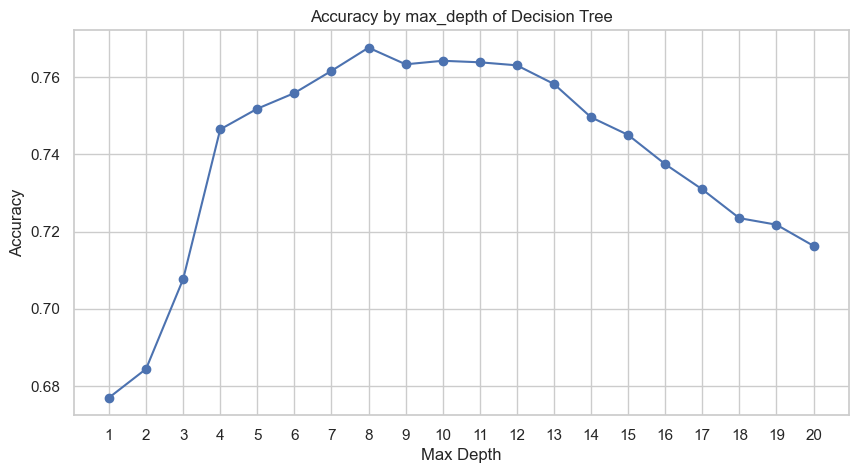

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(depths, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title("Accuracy by max_depth of Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(depths)
plt.show()

从结果来看，当max_depth为8的时候，决策树模型的准确率能够达到一个最高点。

接着尝试的值：

In [42]:
# 准备存储结果
leaf_sizes = range(1, 51)  # 测试从1到50的min_samples_leaf
accuracy_scores = []

# 循环不同的min_samples_leaf值
for leaf_size in leaf_sizes:
    clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=leaf_size, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracy_scores.append(accuracy)
    print(f"Min samples leaf: {leaf_size}, Accuracy: {accuracy}")

# 找出最高准确率及其对应的叶节点最小样本数
best_accuracy = max(accuracy_scores)
best_leaf_size = leaf_sizes[accuracy_scores.index(best_accuracy)]
print(f"Best accuracy: {best_accuracy} at min_samples_leaf: {best_leaf_size}")

Min samples leaf: 1, Accuracy: 0.7676424464192368
Min samples leaf: 2, Accuracy: 0.7680345007841087
Min samples leaf: 3, Accuracy: 0.7681651855723993
Min samples leaf: 4, Accuracy: 0.7688186095138526
Min samples leaf: 5, Accuracy: 0.7684265551489806
Min samples leaf: 6, Accuracy: 0.7690799790904339
Min samples leaf: 7, Accuracy: 0.7686879247255619
Min samples leaf: 8, Accuracy: 0.7689492943021432
Min samples leaf: 9, Accuracy: 0.7696027182435965
Min samples leaf: 10, Accuracy: 0.7694720334553058
Min samples leaf: 11, Accuracy: 0.7697334030318871
Min samples leaf: 12, Accuracy: 0.7696027182435965
Min samples leaf: 13, Accuracy: 0.7694720334553058
Min samples leaf: 14, Accuracy: 0.7689492943021432
Min samples leaf: 15, Accuracy: 0.7688186095138526
Min samples leaf: 16, Accuracy: 0.7689492943021432
Min samples leaf: 17, Accuracy: 0.7689492943021432
Min samples leaf: 18, Accuracy: 0.7694720334553058
Min samples leaf: 19, Accuracy: 0.7694720334553058
Min samples leaf: 20, Accuracy: 0.769341

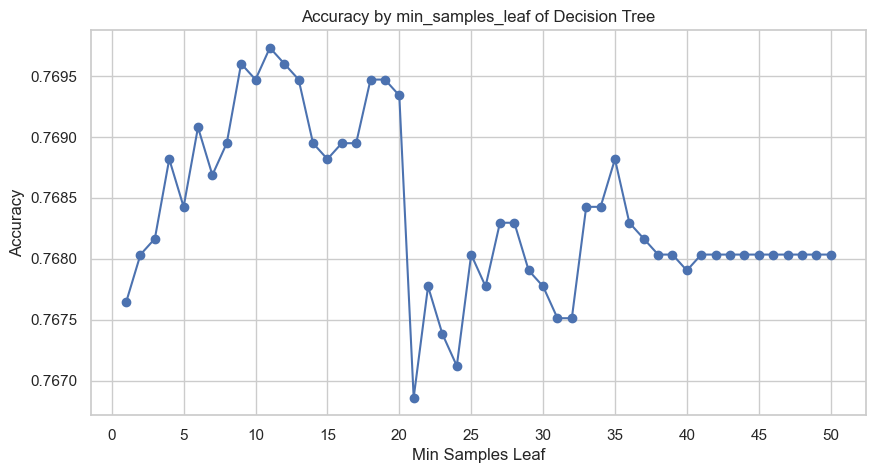

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(leaf_sizes, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title("Accuracy by min_samples_leaf of Decision Tree")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(0, 51, 5))  # 显示从0到50的标签
plt.show()

可以认为min_samples_leaf: 11的时候，准确率最佳，采用这个参数。

得到一个max_depth为8并且min_samples_leaf为11的最佳的决策树模型：

In [44]:
# 使用最佳参数创建决策树模型
best_tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=11, random_state=42)

# 训练模型
best_tree.fit(X_train, y_train)

# 预测验证集
y_val_pred = best_tree.predict(X_val)

# 计算准确率
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# 生成并打印详细的分类报告
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7697334030318871
              precision    recall  f1-score   support

     Dropout       0.88      0.75      0.81      2566
    Enrolled       0.53      0.53      0.53      1495
    Graduate       0.80      0.88      0.84      3591

    accuracy                           0.77      7652
   macro avg       0.74      0.72      0.73      7652
weighted avg       0.77      0.77      0.77      7652



在使用最佳参数 `max_depth` 为 8 和 `min_samples_leaf` 为 11 训练的决策树模型上，验证集的表现结果显示总体准确率为76.97%。这个结果表明模型具有较好的预测能力，能够在大多数情况下正确分类学生的状态。准确率的提升反映了参数调优的成功，特别是在处理可能导致过拟合的决策树深度和叶节点最小样本数上的精细调整。

从详细的分类报告中可以看出，对于“辍学”类别，模型展现出了较高的精确度（88%）和召回率（75%），f1-score 为 0.81，这说明模型在预测辍学学生时不仅精确度高，而且漏判率较低。然而，对于“在读”学生，虽然精确度和召回率相对均衡（均为53%），但整体表现仍有提升空间，f1-score 为 0.53。这可能是因为在读学生的特征不够显著或数据中存在较多噪声，使得模型难以区分这一类别。对于“毕业”学生，模型的表现也相对较好，精确度为80%，召回率为88%，f1-score 为 0.84，显示出对完成学业学生的较好识别能力。

综上所述，虽然模型在所有类别上表现出了较高的总体准确性，但在不同类别之间的表现还是有差异。特别是对于在读学生的预测，需要进一步的模型优化或可能的数据预处理来提高识别准确性。未来的工作可以探索更多的特征工程策略、尝试不同的分类算法或进一步调整模型参数，以增强模型对各个类别的预测能力。

最后在测试集上面尝试一下这个模型，查看性能和泛化性：

In [47]:
# 预测验证集
y_test_pred = best_tree.predict(X_test)

# 计算准确率
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", val_accuracy)

# 生成并打印详细的分类报告
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.7697334030318871
              precision    recall  f1-score   support

     Dropout       0.87      0.76      0.81      5028
    Enrolled       0.51      0.50      0.51      3017
    Graduate       0.80      0.88      0.84      7259

    accuracy                           0.76     15304
   macro avg       0.73      0.71      0.72     15304
weighted avg       0.77      0.76      0.76     15304



模型在测试集上的表现提供了有关其泛化能力的重要信息。测试集的结果显示模型的总体准确率为76.97%，与验证集上的表现相匹配。这表明决策树模型能够在未见的数据上维持一致的性能，说明了其良好的泛化能力。

在类别的具体表现上，模型在辨别“辍学”学生时表现较好，具有87%的精确度和76%的召回率，f1-score为0.81。这一结果说明模型在识别实际辍学的学生方面效果显著，而将非辍学学生错误分类为辍学的情况相对较少。对于“在读”学生，精确度和召回率分别为51%和50%，f1-score为0.51。这个类别的表现依然是三个类别中最低的，反映了模型在识别当前仍在学习状态的学生上存在一定的挑战。对于“毕业”学生，模型的表现再次较好，精确度为80%，召回率为88%，f1-score为0.84，表明模型能较准确地识别出已经完成学业的学生。

从宏观平均和加权平均的评分来看，模型在各个类别上的表现还是较为均衡的。宏观平均的精确度、召回率和f1-score分别为73%、71%和72%，而加权平均的这些指标为77%、76%和76%。这些评分反映了模型在处理不同类别的数据时的表现，尤其是在较大的类别（如毕业生）中的高性能对整体评分有积极的影响。

总体而言，这个决策树模型表现出了可靠的预测能力和良好的泛化性。尽管在预测在读状态的学生时仍有改进空间，但模型在处理辍学和毕业两个关键类别上的表现非常强劲。未来的工作可以集中在通过特征工程、参数调整或采用更复杂的模型来提高对在读学生状态的预测准确性，从而进一步提升模型的总体表现。

## 随机森林

导入必备的库：

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

不同的参数：

In [49]:
# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

开始训练模型：

In [ ]:
# 创建随机森林模型
rf = RandomForestClassifier(random_state=42)

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
